## Task 1: Backpropagation Implementation for Binary Classification 

### 1) Dataset Creation

* Generate a synthetic dataset for binary classification using the make_blobs
function from the scikit-learn library.
* The dataset should have 1000 samples, 2 features, and their respective binary
labels.
* Split the dataset into train and test sets.
* Plot the training data using matplotlib.

In [136]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np

In [137]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Reshape y_train and y_test to have shape (800, 1) and (200, 1)
y_train = y_train.reshape(-1, 1) #To make (800,) to (800,1)
y_test = y_test.reshape(-1, 1)

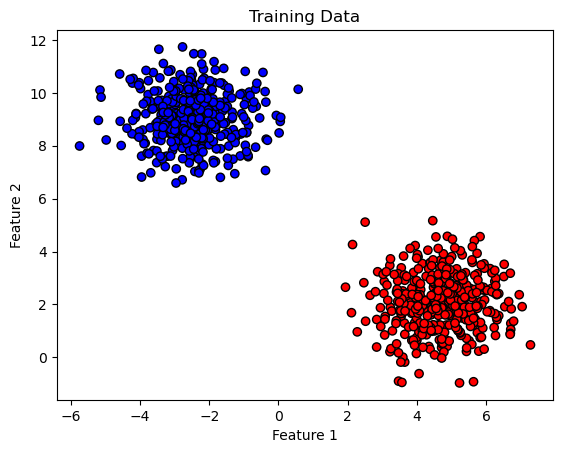

In [138]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k', marker='o')
plt.title("Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 2) Implement Backpropagation

* Create a small neural network from scratch with the following specifications:
    * Input layer with 2 neurons.
    * One hidden layer with 4 neurons using the sigmoid activation function.
    * Output layer with 1 neuron using the sigmoid activation function.
* Implement forward and backward propagation manually to train the network.
* Update the weights using gradient descent.
* Evaluate the model on the test set and print its accuracy

In [139]:
input_size = 2  # Number of input features
hidden_size = 4  # Number of neurons in the hidden layer
output_size = 1

In [140]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error loss function
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

In [141]:
np.random.seed(1)
w_i_h = np.random.randn(2, 4)  # generates a matrix of random values with dimensions (2, 4)
b_h = np.zeros((1, 4))  # Bias for hidden layer
w_h_o = np.random.randn(4, 1)  # Weights from hidden to output layer
b_o = np.zeros((1, 1))

learning_rate = 0.1
epochs = 1000


In [142]:
def forward(X):
    z1 = np.dot(X, w_i_h) + b_h
    output_h = sigmoid(z1)

    # Output layer
    z2 = np.dot(output_h, w_h_o) + b_o
    #print("Shape z2",z2.shape)
    output_o = sigmoid(z2)
    #print("Shape Out_o",output_o.shape)
    return output_h,output_o

In [143]:
def backward(X, y, output_h, output_o, learning_rate):

       # Backward propagation (gradient descent)
    # Output layer
    #print("y train shape", y_train.shape)
    error = y - output_o  # Compute the error (loss)

    #print("Error", error.shape)
    d_output_o = error * sigmoid_derivative(output_o)
    global w_h_o, b_o, w_i_h, b_h

    # Hidden layer
    d_output_h = d_output_o.dot(w_h_o.T) * sigmoid_derivative(output_h)

    # Update weights and biases
    w_h_o += output_h.T.dot(d_output_o) * learning_rate
    b_o += np.sum(d_output_o,axis=0) * learning_rate

    w_i_h += X_train.T.dot(d_output_h) * learning_rate
    b_h += np.sum(d_output_h,axis=0) * learning_rate
    return error


In [144]:


for epoch in range(epochs):
        # Forward pass
    output_h, output_o = forward(X_train)
    
    # Backward pass 
    error=backward(X_train, y_train, output_h, output_o, learning_rate)
    
    if epoch % 100 == 0:
        loss = np.mean(np.square(error)) 
        print("Epoch", epoch, "Loss:",loss)

 
output_h, output_o = forward(X_test)
predictions = output_o > 0.5  # Convert probabilities to binary output
accuracy = np.mean(predictions == y_test)  # Calculate accuracy

print("Accuracy", accuracy * 100,"%")

Epoch 0 Loss: 0.3801271343582233
Epoch 100 Loss: 0.00014031002503873404
Epoch 200 Loss: 6.677463023710444e-05
Epoch 300 Loss: 4.376568048373604e-05
Epoch 400 Loss: 3.253515829667369e-05
Epoch 500 Loss: 2.5885122314737515e-05
Epoch 600 Loss: 2.148910178866949e-05
Epoch 700 Loss: 1.8367695117670332e-05
Epoch 800 Loss: 1.6037000966826268e-05
Epoch 900 Loss: 1.4230489323469914e-05
Accuracy 100.0 %


### 3) Decision Boundary Visualization (1 Marks)
Plot the decision boundary of the trained model using the training dataset.


(100, 100)


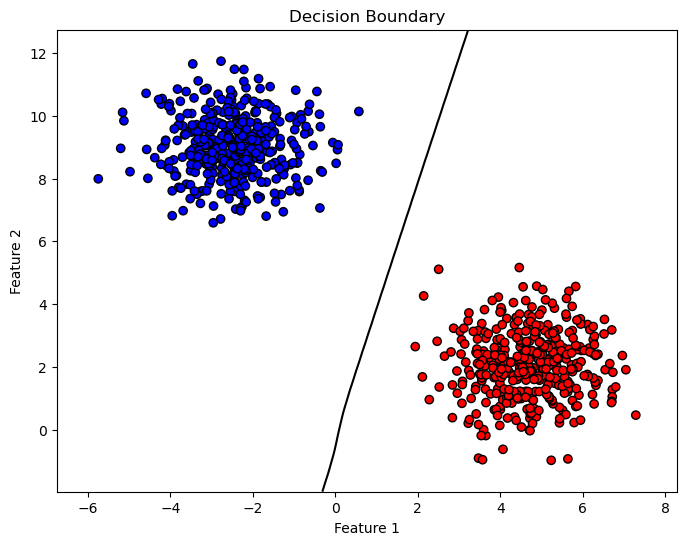

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# Define the forward propagation function (same as before)
def forward(X):
    z1 = np.dot(X, w_i_h) + b_h  # Linear combination for hidden layer
    output_h = sigmoid(z1)  # Apply sigmoid activation to hidden layer
    
    z2 = np.dot(output_h, w_h_o) + b_o  # Linear combination for output layer
    output_o = sigmoid(z2)  # Apply sigmoid activation to output layer
    
    return output_o

# Create a grid of points covering the input space
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Create an input matrix o
grid_points = np.c_[xx.ravel(), yy.ravel()] #concats points
#print(grid_points.shape)(1000 * 2)
# Get predictions for all points in the grid
predictions = forward(grid_points)
predictions = predictions.reshape(xx.shape)
print(predictions.shape)
# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, predictions, levels=[0,0.5,1], colors='black')  
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), cmap=plt.cm.bwr, edgecolors='k', marker='o')

# Label the plot
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()


## Task 2: Multiclass Classification Using TensorFlow (4 Marks)

### Dataset Preparation
* Use the MNIST dataset for this task (refer to TensorFlow documentation for
loading the dataset).
* Split the dataset into train, validation, and test sets.

In [146]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [147]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the data for 0 to 1 value and change 28x28 images to 784 features)
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255

# transforms a class label into a binary vector, where each position corresponds to a specific class.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the data into train, validation, and test sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)


### Model Creation and Training (2 Marks)
* Create a neural network using TensorFlow for multiclass classification. The
model should include:
    * Input layer matching the dataset features.
    * At least two hidden layers with a customizable number of neurons.
    * An output layer with softmax activation (the number of neurons should equal the number of classes).


In [148]:
def create_model(first_layer_no, sec_layer_no, optimizer, regularizer, use_batch_norm, dropout_rate=0.5):
    model = Sequential()

    # Input layer (784 neurons)
    model.add(Dense(128, input_shape=(784,), activation='relu', kernel_regularizer=regularizer)) #Dense:fully connected, 
    if use_batch_norm:
        model.add(BatchNormalization())
    
    # First hidden layer (128 neurons)
    model.add(Dense(first_layer_no, activation='sigmoid', kernel_regularizer=regularizer))
    if use_batch_norm:
        model.add(BatchNormalization())

    # Second hidden layer (64 neurons)
    model.add(Dense(sec_layer_no, activation='sigmoid', kernel_regularizer=regularizer))
    if use_batch_norm:
        model.add(BatchNormalization())
    

    # Output layer (10 neurons for the 10 classes)
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model 
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) #
     # Cross entropy : calculates difference b/w predicted prob and one-hot encoded labels
    
    return model

# Choose regularizer (L1, L2) and optimizer (SGD, Adam, RMSprop)


### Experiment with the following:
* Regularization techniques: L1, L2, and Dropout.
* Optimizers: SGD, Adam, and RMSprop.
* With and without Batch Normalization.

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2

first_layer_no, sec_layer_no =128,64

In [150]:
optimizers = [SGD(), Adam(), RMSprop()]
batch_normalization_options = [False, True]
dropout_rates = [None, 0.2]
regularizers = [None, l1(0.01), l2(0.01)]
results=[]

for regularizer in regularizers:
    for optimizer in optimizers:
        for dropout_rate in dropout_rates:
            for batch_norm in batch_normalization_options:
                    # Create a new optimizer instance
                if isinstance(optimizer, SGD):
                    optimizer_instance = SGD()
                elif isinstance(optimizer, Adam):
                    optimizer_instance = Adam()
                elif isinstance(optimizer, RMSprop):
                    optimizer_instance = RMSprop()
                model = create_model(first_layer_no, sec_layer_no, optimizer=optimizer_instance, regularizer=regularizer, use_batch_norm=batch_norm, dropout_rate=0.5)
                    
                    # Train the model 
                #history contains the loss and accuracy values for each epoch
                history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))

                
                
                test_loss, test_acc = model.evaluate(x_test, y_test)
                results.append({
                'regularizer': regularizer.__class__.__name__,
                'optimizer': optimizer.__class__.__name__,
                'batch_norm': batch_norm,
                'dropout_rate': dropout_rate,
                'test_loss': test_loss,
                'test_acc': test_acc
                })
            
                print(f"Test accuracy with regularizer: {regularizer.__class__.__name__} , optimizer: {optimizer.__class__.__name__}, "
                  f"batch normalization: {batch_norm}, dropout rate: {dropout_rate} => Test Accuracy: {test_acc:.4f}")

# Identify the best combination based on test accuracy
best_result = max(results, key=lambda x: x['test_acc'])
print("Best Configuration:")
print(best_result)


Epoch 1/5


/home/chandana/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1304 - loss: 2.2999 - val_accuracy: 0.2066 - val_loss: 2.2570
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2958 - loss: 2.2384 - val_accuracy: 0.3636 - val_loss: 2.1588
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4252 - loss: 2.1086 - val_accuracy: 0.4980 - val_loss: 1.8983
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5047 - loss: 1.7977 - val_accuracy: 0.5763 - val_loss: 1.4900
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6076 - loss: 1.4026 - val_accuracy: 0.6806 - val_loss: 1.1748
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6693 - loss: 1.2135
Test accuracy with regularizer: NoneType , optimizer: SGD, batch normalization: False, dropout rate: None => Test Accuracy: 0.6864
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7888 - loss: 0.6902 - val_accuracy: 0.9288 - val_loss: 0.2532
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 

### 2)Model Evaluation and Hyperparameter Optimization (2 Mark)
* Train the model and evaluate it on the test set using accuracy, loss, and a
confusion matrix.
* Identify the optimal combination of:
    * Regularization technique.
    * Optimizer.
    * Batch Normalization usage.
* Justify your findings based on the results obtained.

In [155]:
import keras_tuner as kt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
# Define the model-building function for Keras Tuner
def build_model_tuner(hp):
    model = models.Sequential()
    
    # First hidden layer hp.Int() dynamically choose the number of neurons in the model
    model.add(layers.Dense(hp.Int('first_layer_neurons', min_value=64, max_value=512, step=64),
                           activation='relu', input_shape=(784,)))
    
    # Second hidden layer
    model.add(layers.Dense(hp.Int('second_layer_neurons', min_value=64, max_value=512, step=64),
                           activation='relu'))
    
    # Dropout layer
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Output layer
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes for MNIST
    
    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['SGD', 'Adam', 'RMSprop']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Initialize Keras Tuner's RandomSearch
tuner = kt.RandomSearch(
    build_model_tuner,  # Tmodel-building function
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=5,  # no of different combinations of hyperparameters will tries
    executions_per_trial=1,  # how many times each trial should be run with the same hyperparameters.
    directory='kt_dir',  
    project_name='hyperparameter_tuning'  
)

# Perform the hyperparameter search
#Generate model based on the hyperparameters defined in build_model_tuner
#Train each model with training data & evaluate its performance on the validation set & track best config
tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

# Retrieve the best trial
best_trial = tuner.oracle.get_best_trials(1)[0]  # Access the first best trial
best_hyperparameters = best_trial.hyperparameters.values  # Get hyperparameters of the best trial


# Retrieve the best model
best_model = tuner.get_best_models(1)[0]

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(x_test, y_test)

print("Best Hyperparameters found by Keras Tuner:", best_hyperparameters)

print(f"Test accuracy of best model: {test_acc}")

Reloading Tuner from kt_dir/hyperparameter_tuning/tuner0.json


/home/chandana/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/chandana/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1220
Best Hyperparameters found by Keras Tuner: {'first_layer_neurons': 128, 'second_layer_neurons': 448, 'dropout_rate': 0.4, 'optimizer': 'RMSprop'}
Test accuracy of best model: 0.9678000211715698


In [152]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


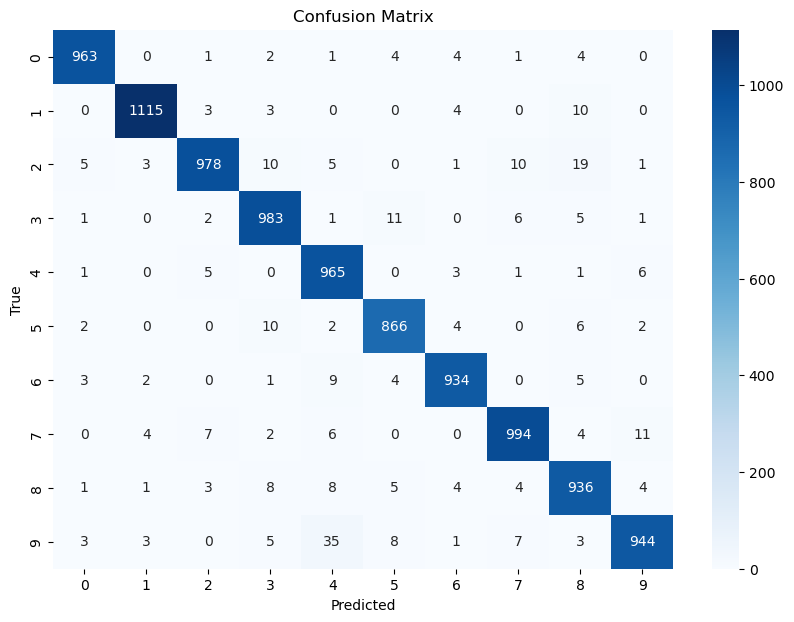

In [158]:
# Get predictions for confusion matrix
y_pred = best_model.predict(x_test)
y_pred_labels = [tf.argmax(i) for i in y_pred]

# Convert one-hot encoded labels to class indices
y_test_labels = tf.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()